This should be run in the directory that contains the original dataset. No further processes should be needed as it will adjust the data as needed in the file.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from IPython.display import display, HTML

Read in data set and investigate the head

In [124]:
df = pd.read_csv('DataSet.csv')
df = df.drop("Unnamed: 0", axis=1)
df = df.sort_index()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,63.0,1,122,1,60,0,267000.0,1.2,145,1,0,147,0
1,50.0,1,168,0,38,1,276000.0,1.1,137,1,0,11,1
2,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1
3,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
4,65.0,0,56,0,25,0,237000.0,5.0,130,0,0,207,0


Look at the dataset attributes to evaluate whether or not a transformation needs to be made.

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       257 non-null    float64
 1   anaemia                   257 non-null    int64  
 2   creatinine_phosphokinase  257 non-null    int64  
 3   diabetes                  257 non-null    int64  
 4   ejection_fraction         257 non-null    int64  
 5   high_blood_pressure       257 non-null    int64  
 6   platelets                 257 non-null    float64
 7   serum_creatinine          257 non-null    float64
 8   serum_sodium              257 non-null    int64  
 9   sex                       257 non-null    int64  
 10  smoking                   257 non-null    int64  
 11  time                      257 non-null    int64  
 12  DEATH_EVENT               257 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 28.1 KB


Further analyze the factors, looking specifically at how they are distributed.

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,60.639507,0.437037,597.674074,0.429630,38.240741,0.348148,264016.054407,1.406889,136.670370,0.662963,0.329630,129.388889,0.325926
std,11.754936,0.496941,1007.037547,0.495943,12.015379,0.477268,97577.471257,1.074922,4.488591,0.473575,0.470952,77.380635,0.469590
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.750000,0.000000,30.000000,0.000000,213500.000000,0.900000,134.000000,0.000000,0.000000,72.250000,0.000000
50%,60.000000,0.000000,251.500000,0.000000,38.000000,0.000000,263179.015000,1.100000,137.000000,1.000000,0.000000,114.000000,0.000000
75%,69.750000,1.000000,582.000000,1.000000,45.000000,1.000000,303750.000000,1.400000,140.000000,1.000000,1.000000,200.750000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,280.000000,1.000000


Investigate correlation between predictors

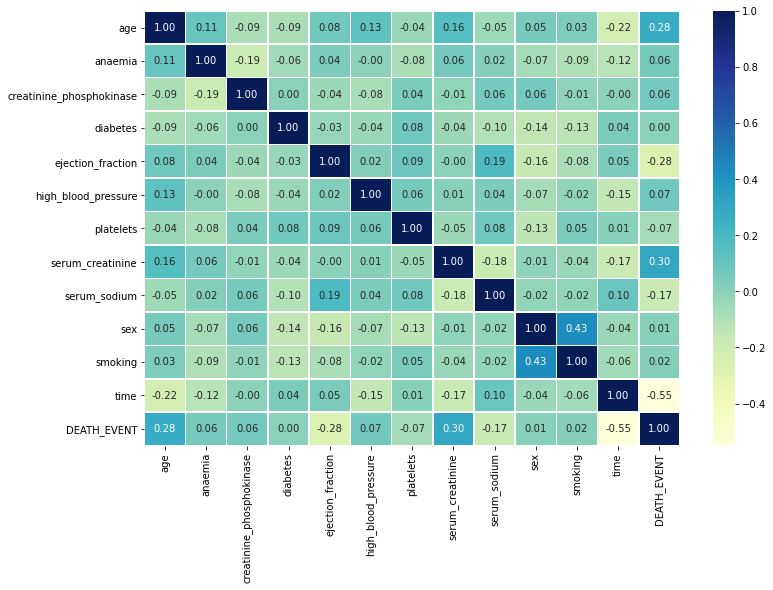

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu');

Find outliers ( >3 standard deviations from mean )

In [125]:
o = {}

for col in df:
    q = df[col].quantile(.9987)
    i = 0
    for item in df[col]:
        if item > q:
            if i in o:
                o[i].append(col + ' - High')
            else:
                o[i] = [col + ' - High']
        i += 1   
         
for col in df:
    q = df[col].quantile(.0013)
    i = 0
    for item in df[col]:
        if item < q:
            if i in o:
                o[i].append(col + ' - Low')
            else:
                o[i] = [col + ' - Low']
        i += 1
        
for outlier in sorted(o):
    print("Index: ", outlier, "Variable: ", o[outlier], "Death: ", df.iloc[outlier]['DEATH_EVENT'])

Index:  6 Variable:  ['time - High'] Death:  0.0
Index:  23 Variable:  ['creatinine_phosphokinase - Low'] Death:  1.0
Index:  46 Variable:  ['serum_sodium - Low'] Death:  0.0
Index:  75 Variable:  ['platelets - High'] Death:  0.0
Index:  133 Variable:  ['time - Low'] Death:  1.0
Index:  142 Variable:  ['serum_sodium - High'] Death:  0.0
Index:  162 Variable:  ['serum_creatinine - High'] Death:  1.0
Index:  205 Variable:  ['age - High'] Death:  1.0
Index:  229 Variable:  ['ejection_fraction - Low'] Death:  1.0
Index:  231 Variable:  ['serum_creatinine - Low'] Death:  0.0
Index:  248 Variable:  ['creatinine_phosphokinase - High'] Death:  1.0
Index:  258 Variable:  ['ejection_fraction - High'] Death:  0.0
Index:  265 Variable:  ['platelets - Low'] Death:  0.0


In [126]:
print(np.mean(df.iloc[list(o.keys())]['DEATH_EVENT']))

0.46153846153846156


Check the distributions of the outlier predictors. Based of of our outliers I expect that some of these distributions might not be normal.

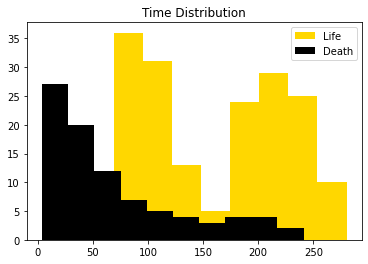

In [9]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["time"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["time"], color='black', label="Death")
_ = plt.title('Time Distribution')
_ = plt.legend()

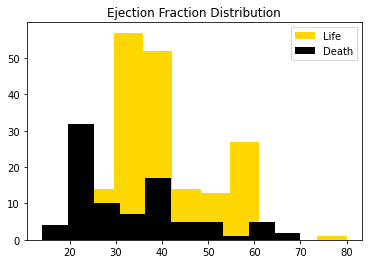

In [10]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["ejection_fraction"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["ejection_fraction"], color='black', label="Death")
_ = plt.title('Ejection Fraction Distribution')
_ = plt.legend()

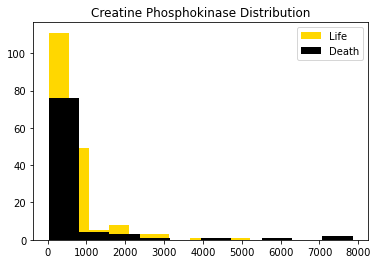

In [11]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["creatinine_phosphokinase"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["creatinine_phosphokinase"], color='black', label="Death")
_ = plt.title('Creatine Phosphokinase Distribution')
_ = plt.legend()

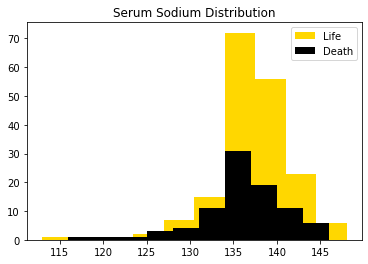

In [12]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["serum_sodium"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["serum_sodium"], color='black', label="Death")
_ = plt.title('Serum Sodium Distribution')
_ = plt.legend()

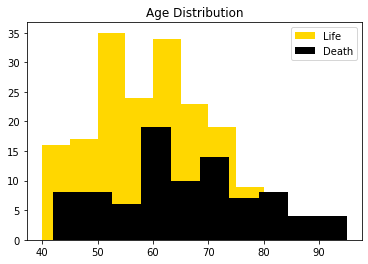

In [13]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["age"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["age"], color='black', label="Death")
_ = plt.title('Age Distribution')
_ = plt.legend()

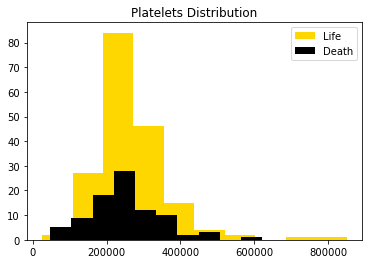

In [14]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["platelets"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["platelets"], color='black', label="Death")
_ = plt.title('Platelets Distribution')
_ = plt.legend()

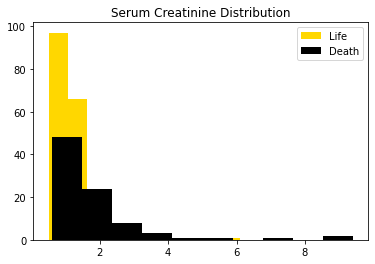

In [15]:
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 0]["serum_creatinine"], color="gold", label="Life")
_ = plt.hist(df.loc[df["DEATH_EVENT"] == 1]["serum_creatinine"], color='black', label="Death")
_ = plt.title('Serum Creatinine Distribution')
_ = plt.legend()

Some of this data is clearly non normal, so using the boxcox transformation we adjust them to increase there normality. They still result in the same outliers.

In [16]:
from scipy import stats
o = {}

for col in df:
    
    a = None
    try:
        a = stats.boxcox(df[col])[0]
    except: 
        continue
        
    q = np.quantile(a, .9987)    
        
    i = 0
    for item in a:
        if item > q:
            if i in o:
                o[i].append(col + ' - High')
            else:
                o[i] = [col + ' - High']
        i += 1   
         
for col in df:
    
    a = None
    try:
        a = stats.boxcox(df[col])[0]
    except: 
        continue
        
    q = np.quantile(a, .0013)    
        
    i = 0
    for item in a:
        if item < q:
            if i in o:
                o[i].append(col + ' - Low')
            else:
                o[i] = [col + ' - Low']
        i += 1
        
for outlier in sorted(o):
    print("Index: ", outlier, "Variable: ", o[outlier], "Death: ", df.iloc[outlier]['DEATH_EVENT'])

Index:  6 Variable:  ['time - High'] Death:  0.0
Index:  23 Variable:  ['creatinine_phosphokinase - Low'] Death:  1.0
Index:  46 Variable:  ['serum_sodium - Low'] Death:  0.0
Index:  75 Variable:  ['platelets - High'] Death:  0.0
Index:  133 Variable:  ['time - Low'] Death:  1.0
Index:  142 Variable:  ['serum_sodium - High'] Death:  0.0
Index:  162 Variable:  ['serum_creatinine - High'] Death:  1.0
Index:  205 Variable:  ['age - High'] Death:  1.0
Index:  229 Variable:  ['ejection_fraction - Low'] Death:  1.0
Index:  231 Variable:  ['serum_creatinine - Low'] Death:  0.0
Index:  248 Variable:  ['creatinine_phosphokinase - High'] Death:  1.0
Index:  258 Variable:  ['ejection_fraction - High'] Death:  0.0
Index:  265 Variable:  ['platelets - Low'] Death:  0.0


Next we remove these outliers.

In [17]:
toDrop = [x for x in o.keys()]
print(list(toDrop))
df = df.drop(toDrop, axis=0)

[205, 248, 258, 75, 162, 142, 6, 23, 229, 265, 231, 46, 133]


Modeling:

Because of how easy it is to use various machine learning models we will use all of the logical models on a set of testing and training data then tune the best model.

Logistic Regression
Naive Bayes
Random Forest Classifier
K-Nearest Neighbour
Decision Tree
Support Vector Machine

First we get a training and testing set

In [137]:
y = df["DEATH_EVENT"]
X = df.drop("DEATH_EVENT",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=6)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Check that there is a even distribution of death events.

In [138]:
print("Test Average: ", np.mean(y_test), "Pop Average: ", np.mean(df['DEATH_EVENT']))

Test Average:  0.3170731707317073 Pop Average:  0.32592592592592595


Split into training and validation data 

In [99]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_train, y_train, test_size=0.21, random_state=6)

In [139]:
print("Test Average: ", np.mean(y_test_t), "Pop Average: ", np.mean(df['DEATH_EVENT']))

Test Average:  0.30434782608695654 Pop Average:  0.32592592592592595


In [140]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train_t, y_train_t)
lr_predict = lr.predict(X_test_t)
lr_conf_matrix = confusion_matrix(y_test_t, lr_predict)
lr_acc_score = accuracy_score(y_test_t, lr_predict)
print("Confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test_t,lr_predict))

Confusion matrix
[[31  1]
 [ 7  7]]


Accuracy of Logistic Regression: 82.6086956521739 

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        32
           1       0.88      0.50      0.64        14

    accuracy                           0.83        46
   macro avg       0.85      0.73      0.76        46
weighted avg       0.83      0.83      0.81        46



In [141]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train_t, y_train_t)
nbpred = nb.predict(X_test_t)
nb_conf_matrix = confusion_matrix(y_test_t, nbpred)
nb_acc_score = accuracy_score(y_test_t, nbpred)
print("Confusion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test_t, nbpred))

Confusion matrix
[[31  1]
 [ 6  8]]


Accuracy of Naive Bayes model: 84.78260869565217 

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        32
           1       0.89      0.57      0.70        14

    accuracy                           0.85        46
   macro avg       0.86      0.77      0.80        46
weighted avg       0.85      0.85      0.84        46



In [142]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier()
rf.fit(X_train_t, y_train_t)
rf_predicted = rf.predict(X_test_t)
rf_conf_matrix = confusion_matrix(y_test_t, rf_predicted)
rf_acc_score = accuracy_score(y_test_t, rf_predicted)
print("Confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test_t, rf_predicted))

for i in range(len(df.columns.values) - 1):
    print("Feature:", df.columns.values[i], "Importance:", rf.feature_importances_[i])

Confusion matrix
[[32  0]
 [ 4 10]]


Accuracy of Random Forest: 91.30434782608695 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.71      0.83        14

    accuracy                           0.91        46
   macro avg       0.94      0.86      0.89        46
weighted avg       0.92      0.91      0.91        46

Feature: age Importance: 0.1102212999624753
Feature: anaemia Importance: 0.015573594928867404
Feature: creatinine_phosphokinase Importance: 0.07600533271958783
Feature: diabetes Importance: 0.011433028057764265
Feature: ejection_fraction Importance: 0.1511716899462835
Feature: high_blood_pressure Importance: 0.014865753620256777
Feature: platelets Importance: 0.09526858621938293
Feature: serum_creatinine Importance: 0.1279541995569013
Feature: serum_sodium Importance: 0.06941072543267876
Feature: sex Importance: 0.010110979544537777
Feature: smoking Importance: 0.010473765249890115

In [143]:
m4 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_t, y_train_t)
knn_predicted = knn.predict(X_test_t)
knn_conf_matrix = confusion_matrix(y_test_t, knn_predicted)
knn_acc_score = accuracy_score(y_test_t, knn_predicted)
print("Confusion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test_t, knn_predicted))

Confusion matrix
[[32  0]
 [11  3]]


Accuracy of K-NeighborsClassifier: 76.08695652173914 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        32
           1       1.00      0.21      0.35        14

    accuracy                           0.76        46
   macro avg       0.87      0.61      0.60        46
weighted avg       0.82      0.76      0.70        46



In [144]:
m5 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train_t, y_train_t)
dt_predicted = dt.predict(X_test_t)
dt_conf_matrix = confusion_matrix(y_test_t, dt_predicted)
dt_acc_score = accuracy_score(y_test_t, dt_predicted)
print("Confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test_t, dt_predicted))

Confusion matrix
[[30  2]
 [ 4 10]]


Accuracy of DecisionTreeClassifier: 86.95652173913044 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.83      0.71      0.77        14

    accuracy                           0.87        46
   macro avg       0.86      0.83      0.84        46
weighted avg       0.87      0.87      0.87        46



In [145]:
m6 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train_t, y_train_t)
svc_predicted = svc.predict(X_test_t)
svc_conf_matrix = confusion_matrix(y_test_t, svc_predicted)
svc_acc_score = accuracy_score(y_test_t, svc_predicted)
print("Confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test_t, svc_predicted))

Confusion matrix
[[28  4]
 [ 6  8]]


Accuracy of Support Vector Classifier: 78.26086956521739 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.67      0.57      0.62        14

    accuracy                           0.78        46
   macro avg       0.75      0.72      0.73        46
weighted avg       0.78      0.78      0.78        46



From the above accuracies we can reasonably conclude that Logistic Regression and Random Forest Classification are our best predictors.

First we will do Logistic Regression. There are not many parameters for this classifier so we will run GridSearchCV to get the best parameters right away.

In [149]:
log_grid = {"C": np.logspace(-4, 4, 50),
            "penalty": ["l1", "l2", "elasticnet", "none"],
            "solver": ["liblinear"]}

In [150]:
gridLog = GridSearchCV(LogisticRegression(),
                          param_grid=log_grid,
                          cv=5,
                          n_jobs=-1)

model = gridLog.fit(X_train, y_train)
gridLog_predict = gridLog.predict(X_test)
gridLog_conf_matrix = confusion_matrix(y_test, gridLog_predict)
gridLog_acc_score = accuracy_score(y_test, gridLog_predict)
print("Best parameters: ", gridLog.best_params_)
print("\n")
print("Confusion matrix")
print(gridLog_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:", gridLog_acc_score*100,'\n')
print(classification_report(y_test, gridLog_predict))


Best parameters:  {'C': 0.08685113737513521, 'penalty': 'l1', 'solver': 'liblinear'}


Confusion matrix
[[26  2]
 [ 2 11]]


Accuracy of Logistic Regression: 90.2439024390244 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.85      0.85      0.85        13

    accuracy                           0.90        41
   macro avg       0.89      0.89      0.89        41
weighted avg       0.90      0.90      0.90        41



Next we will tune the Random Forest Classifier.

There are many parameters that are going to be searched so we will run a randomized model first and look to see if any values are correlated with the death event and then tune the parameter ranges accordingly.

In [146]:
rf_grid_rand = {"n_estimators": np.arange(10, 1000, 50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2),
                "random_state": np.arange(1, 10, 1),
                "max_depth": np.arange(1, 10, 1)
                }

randTree = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid_rand,
                                cv=5,
                                n_jobs=-1,
                                n_iter=100,
                                random_state=6
                             )

randTree.fit(X_train,y_train)

results = pd.DataFrame(randTree.cv_results_).drop(["mean_fit_time", "std_fit_time",
                                                  "mean_score_time", "std_score_time",
                                                  "split0_test_score", "split2_test_score",
                                                  "split3_test_score", "split4_test_score",
                                                  "split1_test_score"], axis=1)

pd.DataFrame(results).to_csv('randTreeCV.csv')

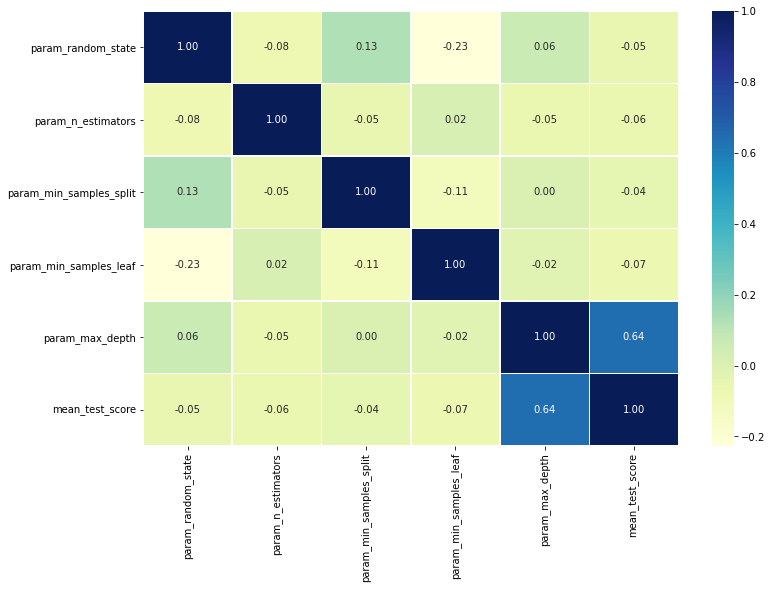

In [147]:
results_corr = results.drop(["params", "std_test_score", "params", "rank_test_score"], axis=1).apply(pd.to_numeric)

corr_matrix = results_corr.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
           annot=True,
           linewidths=0.5,
           fmt='.2f',
           cmap='YlGnBu');

From the correlation grid we can see that max depth is correlated with test score so we will focus on being precise with this parameter well with the others we will reduce the step size before running a more rigorous GridSearchCV.

In [152]:
rf_grid_Grid = {"n_estimators": np.arange(10, 500, 50),
                "min_samples_split": np.arange(2, 20, 4),
                "min_samples_leaf": np.arange(1, 20, 2),
                "random_state": np.arange(1, 2, 1),
                "max_depth": np.arange(1, 10, 1)
                }

gridTree = GridSearchCV(RandomForestClassifier(),
                            param_grid=rf_grid_Grid,
                            cv=5,
                            n_jobs=-1,
                            verbose=True,
                        )

gridTree.fit(X_train,y_train)
gridTree_predicted = gridTree.predict(X_test)
gridTree_conf_matrix = confusion_matrix(y_test, gridTree_predicted)
gridTree_acc_score = accuracy_score(y_test, gridTree_predicted)
print("Best parameters: ", gridTree.best_params_)
print("\n")
print("Confusion matrix")
print(gridTree_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",gridTree_acc_score*100,'\n')
print(classification_report(y_test, gridTree_predicted))

for i in range(len(df.columns.values) - 1):
    print("Feature:", df.columns.values[i],
          "Importance:", gridTree.best_estimator_.feature_importances_[i])

Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6018 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 8418 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 9768 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 11218 tasks      

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 14, 'n_estimators': 360, 'random_state': 1}


Confusion matrix
[[28  0]
 [ 4  9]]


Accuracy of Random Forest: 90.2439024390244 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.69      0.82        13

    accuracy                           0.90        41
   macro avg       0.94      0.85      0.88        41
weighted avg       0.91      0.90      0.90        41

Feature: age Importance: 0.07503503606101657
Feature: anaemia Importance: 0.00486105742871176
Feature: creatinine_phosphokinase Importance: 0.050128522465979784
Feature: diabetes Importance: 0.0046600784520917865
Feature: ejection_fraction Importance: 0.14010001863959098
Feature: high_blood_pressure Importance: 0.005694393236171485
Feature: platelets Importance: 0.05509628257711482
Feature: serum_creatinine Importance: 0.1452133709756983
Feature: serum_sodium 